In [22]:
#1."To perform initial exploratory data analysis (EDA) on the real estate sales dataset
#   by loading, cleaning, and summarizing the data to prepare it for deeper statistical or visual analysis."


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv(r"C:\Users\jg275\Downloads\Real_Estate_Sales_2001-2022_GL.csv", encoding='Latin1')

print(" Basic Info:")
print(df.info())

print("\n Missing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe(include='all'))


df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')

df_cleaned = df.dropna(thresh=len(df.columns) - 3)
df_cleaned.fillna(method='ffill', inplace=True)

if 'Date' in df_cleaned.columns:
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

print("\nStatistical Summary:")
print(df_cleaned.describe(include='all'))

import warnings
warnings.filterwarnings('ignore')

 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306043 entries, 0 to 306042
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     306043 non-null  int64  
 1   List Year         306043 non-null  int64  
 2   Date Recorded     306043 non-null  object 
 3   Town              306043 non-null  object 
 4   Address           306040 non-null  object 
 5   Assessed Value    306043 non-null  float64
 6   Sale Amount       306043 non-null  float64
 7   Sales Ratio       306043 non-null  float64
 8   Property Type     294403 non-null  object 
 9   Residential Type  278460 non-null  object 
 10  Non Use Code      83982 non-null   object 
 11  Assessor Remarks  68079 non-null   object 
 12  OPM remarks       10416 non-null   object 
 13  Location          153441 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 32.7+ MB
None

 Missing Values:
Serial Number         

In [3]:
# 2."To clean and standardize the real estate dataset by addressing common data quality issues 
#  such as whitespace, duplicates, missing values, and date parsing, ensuring the dataset is ready for accurate analysis and visualization."

#Data Cleaning Process

'''
1. Whitespace in column names

2. Duplicate and empty rows

3. Datetime parsing

4. Standardized column naming'''

print("Initial shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

print("\n strip columns")
df.columns = df.columns.str.strip()
print(df.columns)

print("\n Drop completely empty rows\n")
df.dropna(how='all', inplace=True)

print("\n Dropping Duplicate rows\n")
df.drop_duplicates(inplace=True)

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

def clean_currency(x):
    if isinstance(x, str):
        return x.replace('$', '').replace(',', '').strip()
    return x

money_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].str.contains(r'\$', na=False).any()]


for col in money_cols:
    df[col] = df[col].apply(clean_currency)
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        print(f" Could not convert {col} to float")


print("Cleaned currency columns:", money_cols)



df.columns = df.columns.str.lower().str.replace(' ','_')


print("\nRemaining missing values:\n", df.isnull().sum())


print("\nCleaned DataFrame shape:", df.shape)
print("\nCleaned data preview:\n", df.head())

Initial shape: (306043, 14)

Missing values:
 Serial Number            0
List Year                0
Date Recorded       121653
Town                     0
Address                  3
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type        11640
Residential Type     27583
Non Use Code        222061
Assessor Remarks    237964
OPM remarks         295627
Location            152602
dtype: int64

 strip columns
Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

 Drop completely empty rows


 Dropping Duplicate rows

 Could not convert Address to float
 Could not convert Assessor Remarks to float
 Could not convert OPM remarks to float
Cleaned currency columns: ['Address', 'Assessor Remarks', 'OPM remarks']

Remaining missing values:
 ser

In [21]:
# 3."To analyze the distribution of categorical variables in the real estate dataset by displaying the most frequent values for each category."
# Unique value counts for categorical columns

df = pd.read_csv(r"C:\Users\jg275\Downloads\Real_Estate_Sales_2001-2022_GL.csv", encoding='Latin1')

categorical_cols = ['Town', 'Property Type', 'Residential Type', 'Non Use Code']
for col in categorical_cols:
    print(f"\n Value counts for {col}:")
    print(df[col].value_counts().head(10))





 Value counts for Town:
Town
Stamford         9458
Waterbury        9423
Bridgeport       8823
New Haven        6855
West Hartford    6550
Stratford        6404
Norwalk          6381
Danbury          5871
Greenwich        5695
Hamden           5632
Name: count, dtype: int64

 Value counts for Property Type:
Property Type
Residential      151064
Single Family     93681
Condo             23705
Vacant Land        7824
Two Family         6427
Commercial         5987
Three Family       3056
Apartments         1327
Industrial          795
Four Family         527
Name: count, dtype: int64

 Value counts for Residential Type:
Residential Type
Single Family    200113
Condo             55107
Two Family        14867
Three Family       7037
Four Family        1336
Name: count, dtype: int64

 Value counts for Non Use Code:
Non Use Code
25 - Other                     23618
07 - Change in Property        17380
14 - Foreclosure               15543
08 - Part Interest              6101
01 - Family     

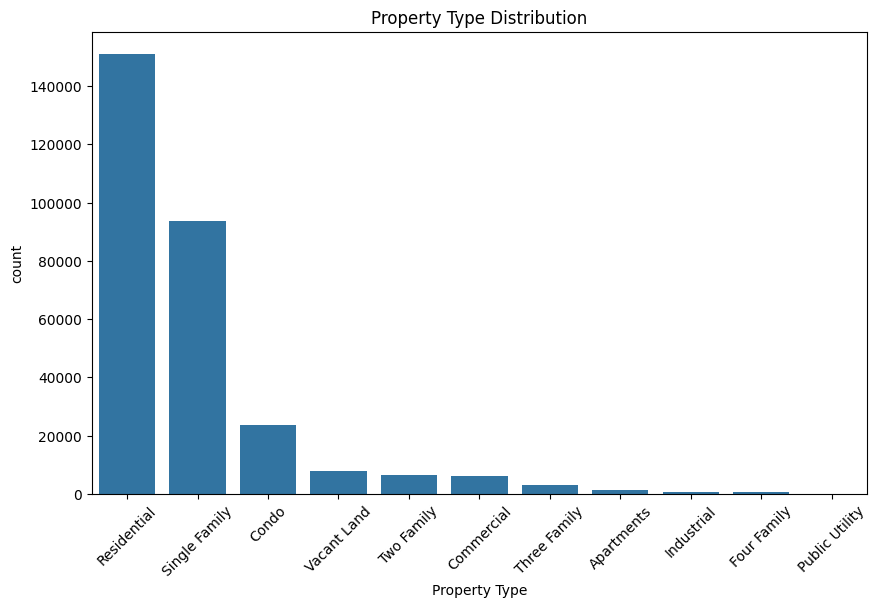

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Property Type', order=df['Property Type'].value_counts().index)
plt.title("Property Type Distribution")
plt.xticks(rotation=45)
plt.show()

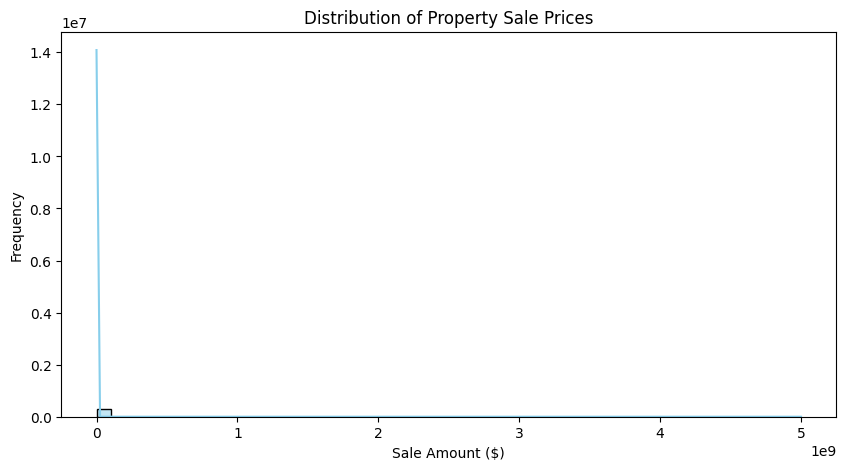

In [28]:
# 4."To visualize the distribution of property sale prices and identify patterns,
#  outliers, or skewness in the sale_amount column using a histogram with a KDE overlay."

# 1. Understand the distribution of property sale prices

plt.figure(figsize=(10, 5))
sns.histplot(df['sale_amount'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Property Sale Prices")
plt.xlabel("Sale Amount ($)")
plt.ylabel("Frequency")
plt.show()

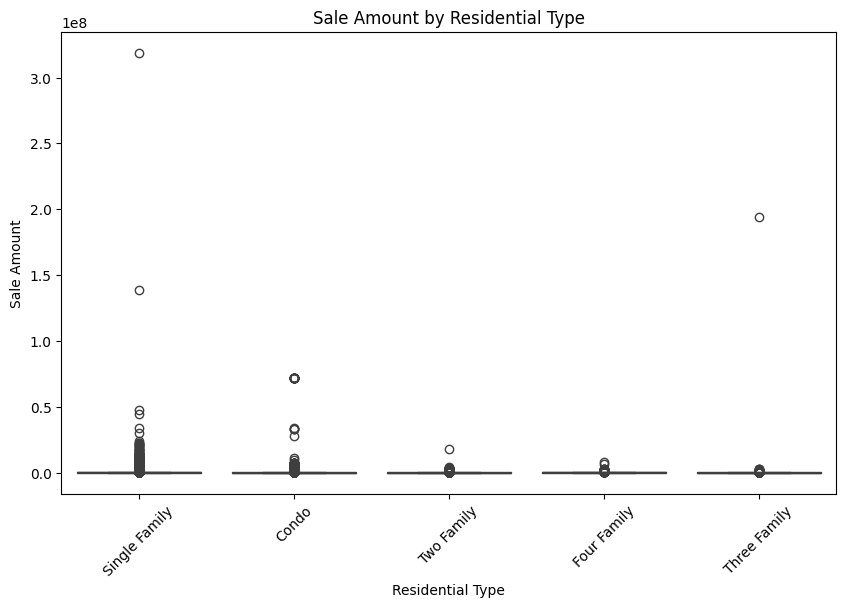

In [11]:
# 5."To compare the distribution and spread of Sale Amount across different Residential Type categories using a box plot."


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Residential Type', y='Sale Amount')
plt.title("Sale Amount by Residential Type")
plt.xticks(rotation=45)
plt.show()

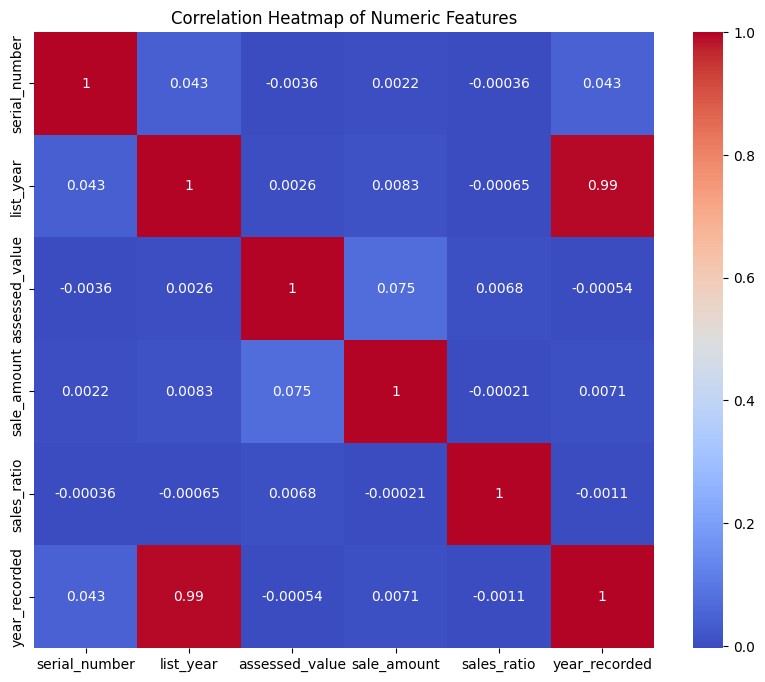

In [40]:
# Explore relationships between numerical features using correlation
# 6."To visualize the strength and direction of relationships between numerical variables in the dataset."

# Correlation heatmap

plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


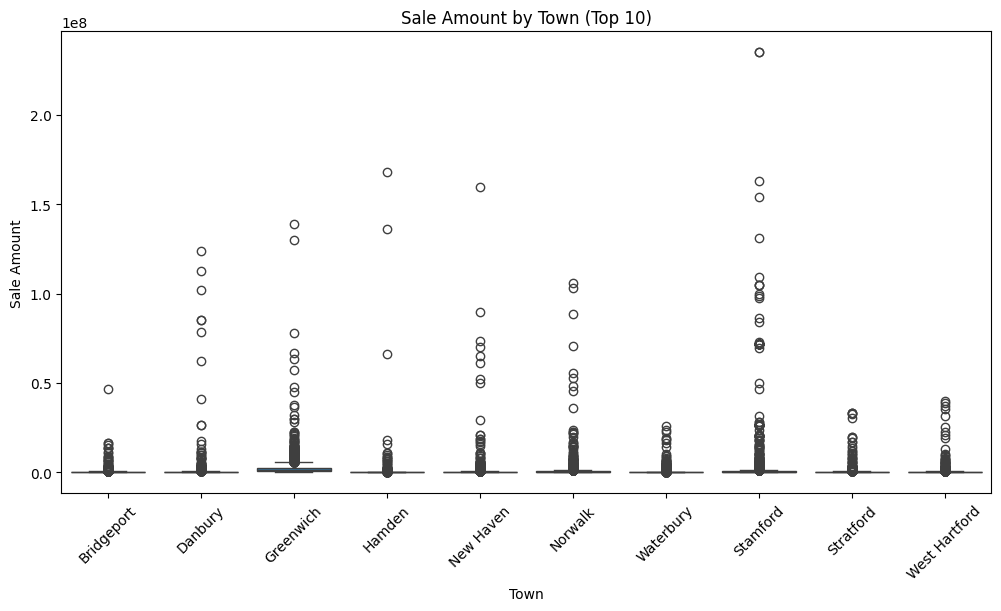

In [12]:
# Sale Amount by Town (top 10 towns only)
# 7."To analyze and compare the distribution of property sale amounts across the top 10 towns with the highest number of sales."
top_towns = df['Town'].value_counts().nlargest(10).index
top_df = df[df['Town'].isin(top_towns)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_df, x='Town', y='Sale Amount')
plt.title("Sale Amount by Town (Top 10)")
plt.xticks(rotation=45)
plt.show()

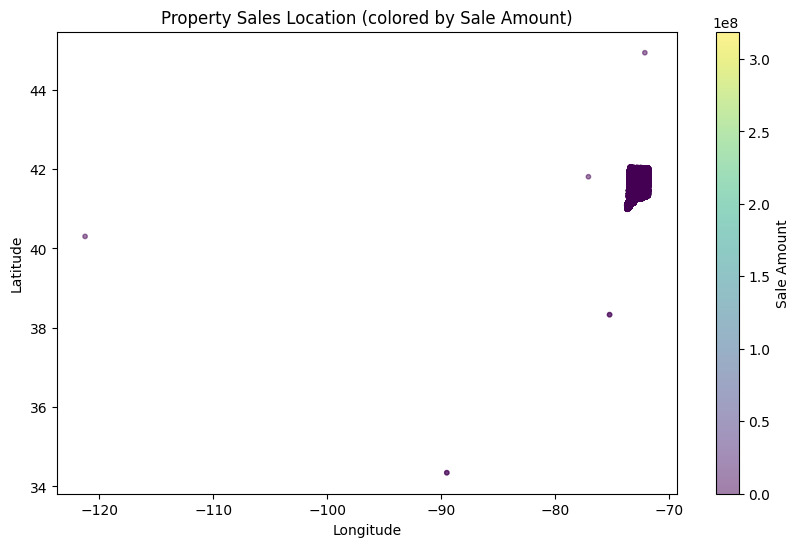

In [18]:
# 8."To visualize the geographic distribution of property sales 
#  using extracted latitude and longitude from the location data, with sale amount as a color gradient."

def extract_coordinates(loc):
    try:
        if isinstance(loc, str) and loc.startswith("POINT"):
            coords = loc.replace("POINT (", "").replace(")", "").split()
            return float(coords[0]), float(coords[1])
    except:
        pass
    return np.nan, np.nan

# Create two new columns
df['Longitude'], df['Latitude'] = zip(*df['Location'].map(extract_coordinates))

# 📍 Plot Geographic Scatter only if Latitude and Longitude are available
if 'Latitude' in df.columns and df['Latitude'].notnull().sum() > 0:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, s=10, c=df['Sale Amount'], cmap='viridis')
    plt.colorbar(label='Sale Amount')
    plt.title("Property Sales Location (colored by Sale Amount)")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
else:
    print("Latitude and Longitude data not available for plotting.")


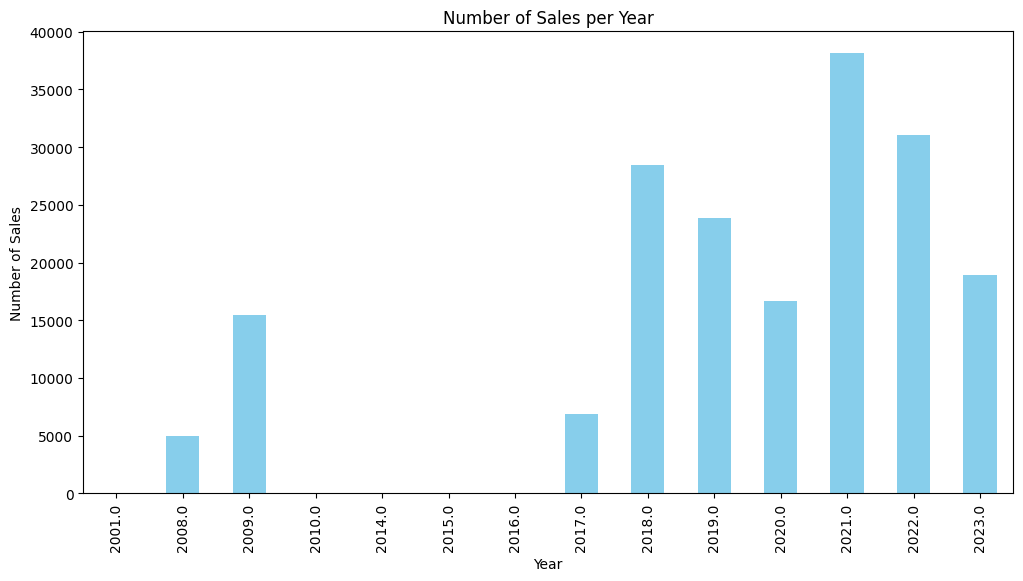

In [20]:
# 9."To analyze the trend in the number of property sales over the years by plotting a bar chart of yearly sale counts."
#Yearly sales count
df['Year'] = df['Date Recorded'].dt.year

yearly_sales = df.groupby('Year')['Sale Amount'].count()

plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar', color='skyblue')
plt.title("Number of Sales per Year")
plt.xlabel("Year")
plt.ylabel("Number of Sales")
plt.show()



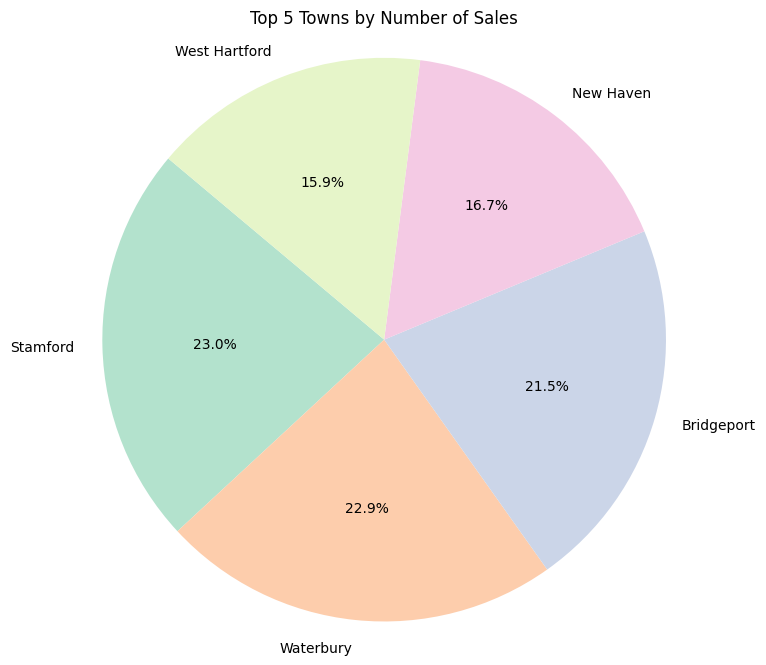

In [11]:
# 10."To identify and visualize the top 5 towns with the highest number of property sales using a pie chart."

import matplotlib.pyplot as plt

# Get top 5 towns by sale count
town_counts = df['town'].value_counts().nlargest(5)

# pie chart
plt.figure(figsize=(8, 8))
plt.pie(town_counts, labels=town_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel2.colors)
plt.title('Top 5 Towns by Number of Sales')
plt.axis('equal')  # Makes it a perfect circle
plt.show()



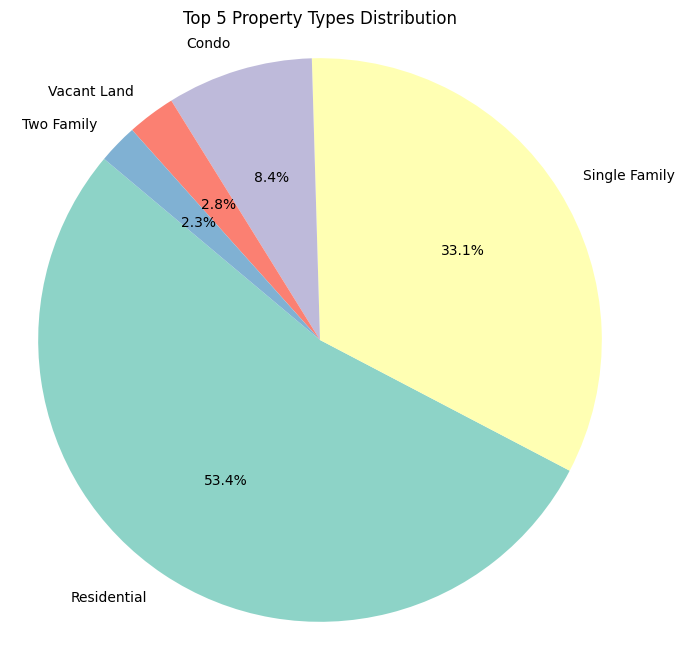

In [12]:
property_counts = df['property_type'].value_counts().nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(property_counts, labels=property_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 5 Property Types Distribution')
plt.axis('equal')
plt.show()


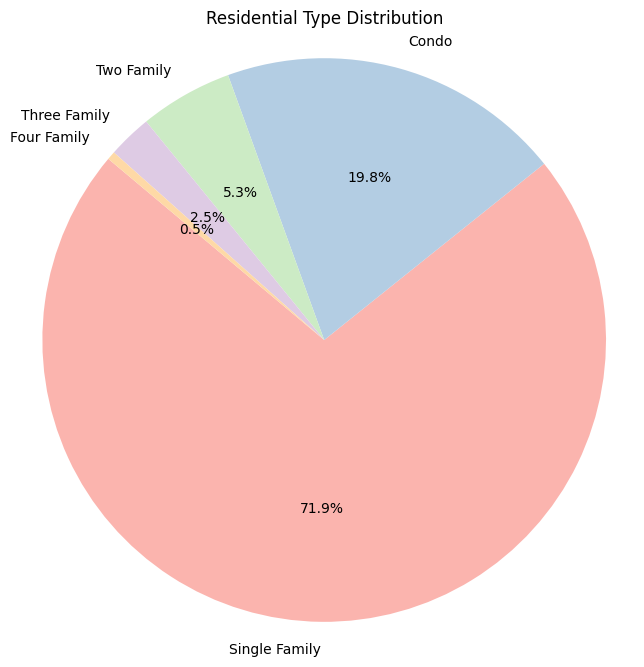

In [13]:
#3. Pie Chart: Residential vs Non-residential Types

res_type_counts = df['residential_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(res_type_counts, labels=res_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Residential Type Distribution')
plt.axis('equal')
plt.show()

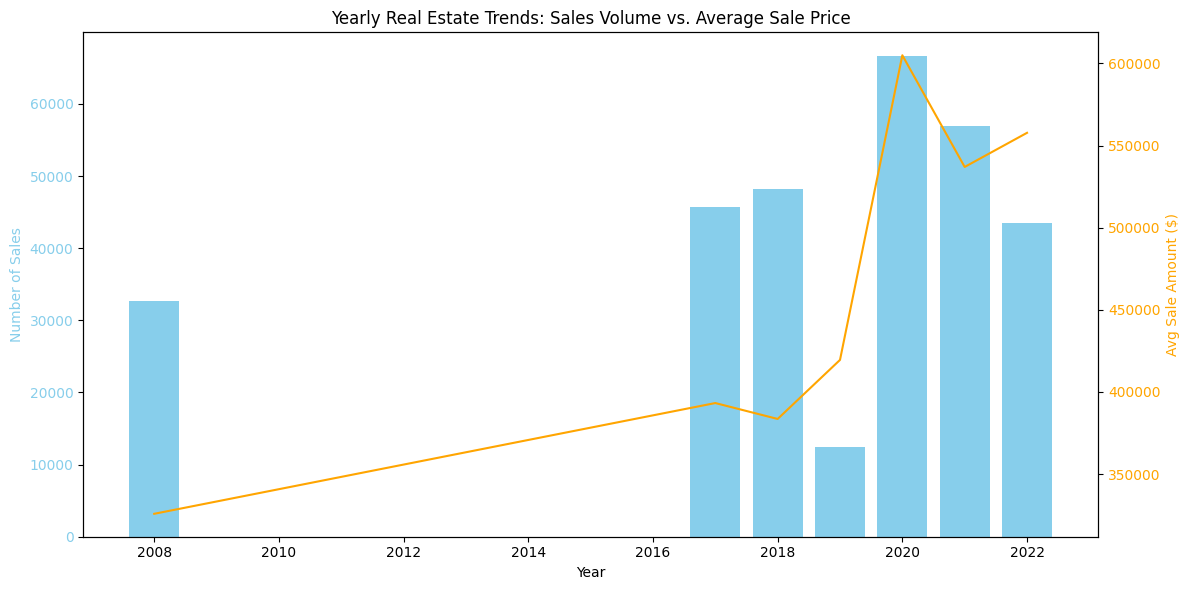

In [14]:
#11.To analyze the trend of the number of sales and the average sale amount over the years.
#This helps in understanding whether the market is getting busier and whether property prices are increasing.

import matplotlib.pyplot as plt
import pandas as pd

# 'list_year' is integer
df['list_year'] = pd.to_numeric(df['list_year'], errors='coerce')

# Drop rows with missing list_year or sale_amount
filtered_df = df.dropna(subset=['list_year', 'sale_amount'])

# Group by year
yearly_summary = filtered_df.groupby('list_year').agg({
    'sale_amount': ['count', 'mean']
}).reset_index()

# Flatten column names
yearly_summary.columns = ['list_year', 'sales_count', 'avg_sale_amount']

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for sales count
ax1.bar(yearly_summary['list_year'], yearly_summary['sales_count'], color='skyblue', label='Number of Sales')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sales', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line chart for average sale amount
ax2 = ax1.twinx()
ax2.plot(yearly_summary['list_year'], yearly_summary['avg_sale_amount'], color='orange', label='Avg Sale Amount')
ax2.set_ylabel('Avg Sale Amount ($)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title and legends
plt.title('Yearly Real Estate Trends: Sales Volume vs. Average Sale Price')
fig.tight_layout()
plt.show()



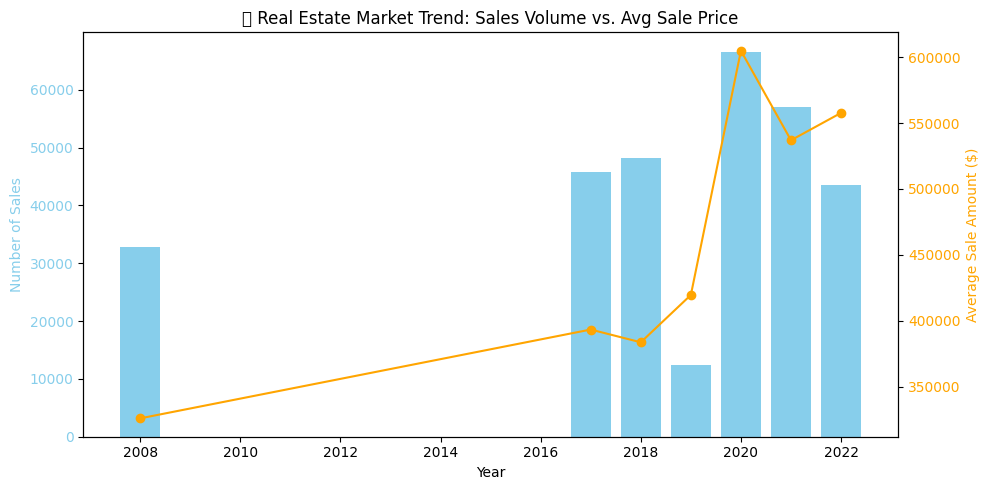

In [15]:
# 12. To visualize how the number of real estate sales and the average sale amount have changed year over year.
#This helps identify trends in market activity and pricing, useful for policymakers, investors, and real estate professionals.

import pandas as pd
import matplotlib.pyplot as plt

#  Clean column names and drop missing entries
df.columns = df.columns.str.lower().str.strip()
df = df.dropna(subset=['list_year', 'sale_amount'])

# Group by year
summary = df.groupby('list_year')['sale_amount'].agg(['count', 'mean']).reset_index()

# combo chart
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart - Number of sales
ax1.bar(summary['list_year'], summary['count'], color='skyblue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sales', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Line chart - Average sale amount
ax2 = ax1.twinx()
ax2.plot(summary['list_year'], summary['mean'], color='orange', marker='o')
ax2.set_ylabel('Average Sale Amount ($)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Title
plt.title('Real Estate Market Trend: Sales Volume vs. Avg Sale Price')
plt.tight_layout()
plt.show()


In [17]:
#13.
#1. Z-Test

#To test whether the average sale amount in a specific town (e.g., "HARTFORD") is significantly different from the overall average sale amount.

from statsmodels.stats.weightstats import ztest

# Filter dataset
df_clean = df[(df['sale_amount'] > 0) & (df['town'].notnull())]
town_data = df_clean[df_clean['town'].str.upper() == 'HARTFORD']['sale_amount']
overall_data = df_clean['sale_amount']

# Z-test
z_stat, p_value = ztest(town_data, value=overall_data.mean())
print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in mean sale amount for HARTFORD.")
else:
    print("No significant difference in mean sale amount for HARTFORD.")



Z-statistic: -11.49
P-value: 0.0000
Significant difference in mean sale amount for HARTFORD.


In [18]:
#14.
#2. Chi-Square Test
#Objective:
#To test whether there's a relationship between property type and residential type.

from scipy.stats import chi2_contingency

# contingency table
contingency_table = pd.crosstab(df['property_type'], df['residential_type'])

# Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("Significant relationship between property type and residential type.")
else:
    print("No significant relationship between property type and residential type.")


Chi-square statistic: 474045.79
P-value: 0.0000
Significant relationship between property type and residential type.


In [21]:
#15.
#3. T-Test
# Objective:
#To compare average sale prices between residential and non-residential properties.

t_stat, p_val = ttest_ind(residential_sales, non_residential_sales, equal_var=False)

# results
print(f"\nT-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("Statistically significant difference in sale amounts.")
else:
    print("No significant difference in sale amounts.")




T-statistic: -0.67
P-value: 0.5055
No significant difference in sale amounts.
